
Отображение географических данных с помощью Cartopy 

Мусаева И.И. ВС-11

---




Cartopy – это библиотека Python, предназначенная для обработки геопространственных данных с целью получения их анализа и карт. 
Cartopy использует мощный PROJ.4, NumPy и Shapely библиотеки и включает в себя программный интерфейс, созданный поверх Matplotlib для создания карт. 

**Установка библиотеки**

In [ ]:
!apt-get -qq install python-cartopy python3-cartopy

Selecting previously unselected package python-pkg-resources.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../4-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../5-pyth

**ДЛЯ ПРЕЗЕНТАЦИИ**

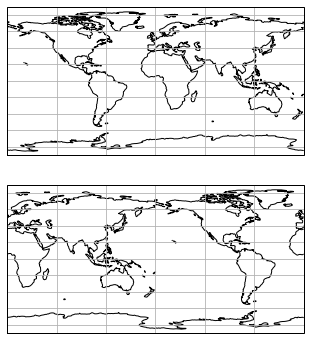

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

nplots = 2

fig = plt.figure(figsize=(6, 6))

for i in range(0, nplots):
    central_longitude = 0 if i == 0 else 180
    ax = fig.add_subplot(
        nplots, 1, i+1,
        projection=ccrs.PlateCarree(central_longitude=central_longitude))
    ax.coastlines(resolution='110m')
    ax.gridlines()

**Проекция Альберса**

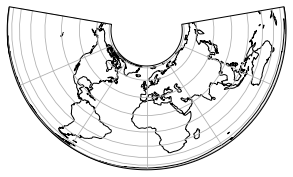

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(5.1299, 3))
ax = plt.axes(projection=ccrs.AlbersEqualArea())
ax.coastlines(resolution='110m')
ax.gridlines()

**Проекция AzimuthalEquidistant**

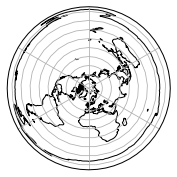

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(3, 3))
ax = plt.axes(projection=ccrs.AzimuthalEquidistant(
                        central_latitude=90))
ax.coastlines(resolution='110m')
ax.gridlines()

Natural Earth, обширный набор бесплатных векторных и растровых карт

In [ ]:
from IPython.display import IFrame
ne = IFrame(src='https://www.naturalearthdata.com/',width=1000,height=500)
display(ne)

**ЗАДАНИЕ**

ВВЕДЕНИЕ В ТЕМУ

Обязательно исполните эту клетку, она обеспечивает все нужные импорты

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.rcParams['figure.figsize'] = [9.5, 6]

NumPy предназначен для работы с большими массивами научных данных. Массивы в NumPy - как Python lists, но гораздо быстрее и имеют ряд полезных функций для работы с ними

In [ ]:
# 1D array
a = np.array([1, 2, 3])

print(type(a))
print(a.shape)

<class 'numpy.ndarray'>
(3,)


In [ ]:
#2D array
b = np.array([[1, 2, 3], [4, 5, 6]])

print(b.shape)

# индексируем через [,] - переопределена индексация
print(b[0, 0])

(2, 3)
1


Создаём массив, заранее зная его размерность

In [ ]:
latsCount = 12 #широта
lonsCount = 10 #долгота

c = np.zeros([latsCount, lonsCount])

print(c.shape)
print(c)

(12, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


linspace, arange - создаём равномерные сетки

In [ ]:
# linspace - сетка по началу, концу и количеству точек
print('linspace:', np.linspace(0, 180, 10), '\n')

# arange - сетка по началу, концу и шагу (аналогично Python range)
print('arange  :', np.arange(0, 180, 5))

linspace: [  0.  20.  40.  60.  80. 100. 120. 140. 160. 180.] 

arange  : [  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175]


Научные данные часто лежат в бинарных файлах, так что данные читаются сначала в одномерный массив. Reshape позволит перевести его в массив нужной размерности (например, 1D -> 4D)

In [ ]:
# reshape
arr = np.arange(9)

print(arr)
arr.reshape(3, 3)


[0 1 2 3 4 5 6 7 8]


array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Важно понимать как именно укладывает данные meshgrid, потому что некоторые функции ожидают данные именно в той форме, которую даёт meshgrid. Он создаёт сетку из всех комбинаций координат

In [ ]:
x_list = np.linspace(-3.0, 3.0, 3)
y_list = np.linspace(-3.0, 3.0, 4)

X, Y = np.meshgrid(x_list, y_list)

print(x_list, y_list)
print(X)
print(Y)


[-3.  0.  3.] [-3. -1.  1.  3.]
[[-3.  0.  3.]
 [-3.  0.  3.]
 [-3.  0.  3.]
 [-3.  0.  3.]]
[[-3. -3. -3.]
 [-1. -1. -1.]
 [ 1.  1.  1.]
 [ 3.  3.  3.]]


Cartopy опирается на matplotlib, задача которого строить графики. Рисование в Cartopy - то же самое, но уходим от Декартовой плоскости к различным проекциям земного шара.

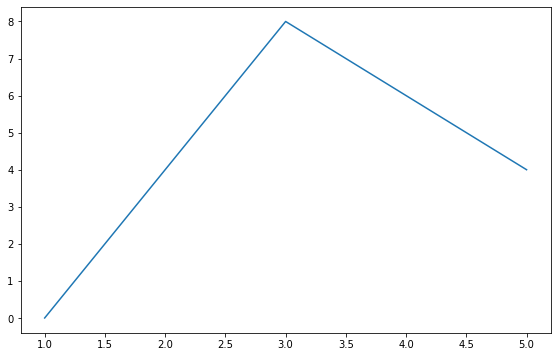

In [ ]:
x = [1, 3, 5]
y = [0, 8, 4]

plt.plot(x, y)

Figure - весь график.
Axis - области внутри графика, где могут быть подграфики, подписи, шкала значений и т.п.
Методы pyplot можно вызывать и непосредственно с axis / figure

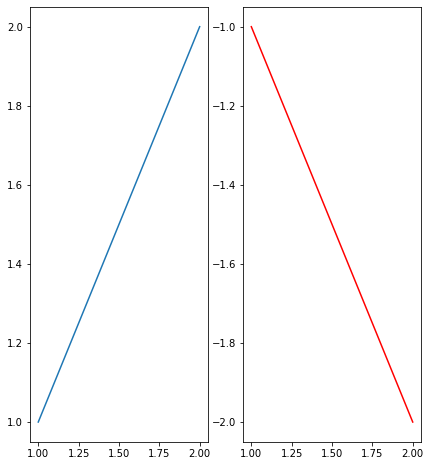

In [ ]:
fig = plt.figure(1, figsize=(7, 8))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot([1, 2], [1, 2])
ax2.plot([1, 2], [-1, -2], 'r')

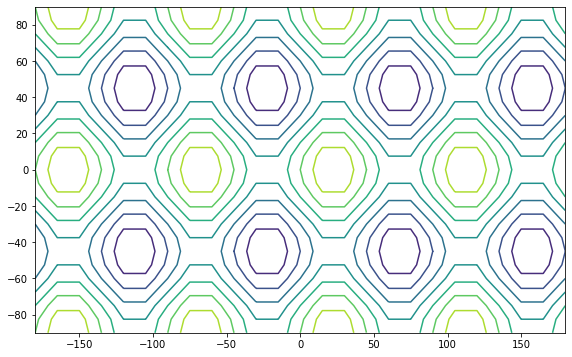

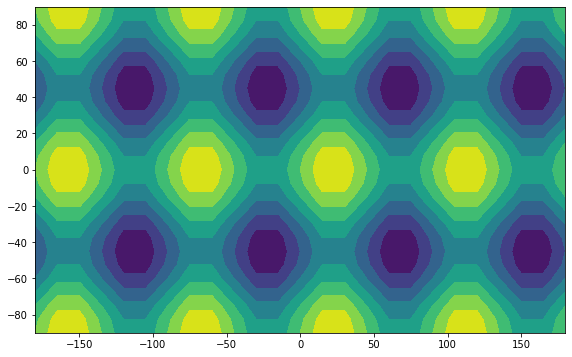

In [ ]:
# contour(f) - наносим данные по сетке координат

lon = np.linspace(-180, 180, 25)
lat = np.linspace(-90, 90, 25)

lon2d, lat2d = np.meshgrid(lon, lat)

data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)

plt.contour(lon2d, lat2d, data)
plt.show()

# f в contourf - это "заливка" 
plt.contourf(lon2d, lat2d, data) 
plt.show()

Добавляем colorbar (шкалу значений).
levels - количество уровней (точность).
cmap - цветовая схема.

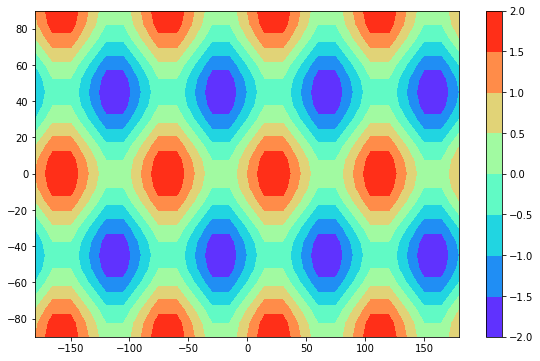

In [ ]:
lon = np.linspace(-180, 180, 25)
lat = np.linspace(-90, 90, 25)

lon2d, lat2d = np.meshgrid(lon, lat)

data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)

cntr = plt.contourf(lon2d, lat2d, data, levels=7, cmap='rainbow') 

plt.colorbar(cntr)

Cartopy опционально зависит от matplotlib,каждая проекция умеет создавать matplotlib Axes(оси).

Axes от Cartopy дополняет существующие в matplotlib методы, добавляя полезные вещи для отрисовки карт

**1. Карта высот**

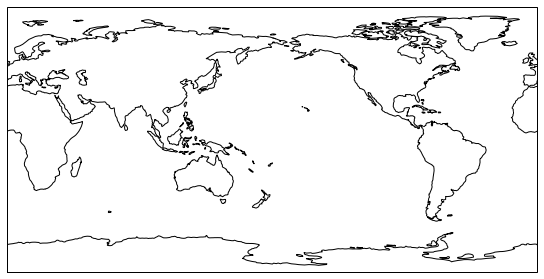

In [ ]:

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

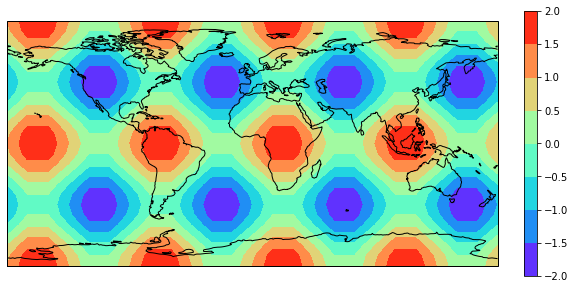

In [ ]:
lon = np.linspace(-180, 180, 25)
lat = np.linspace(-90, 90, 25)

lon2d, lat2d = np.meshgrid(lon, lat)

data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

cntr = ax.contourf(lon, lat, data, cmap='rainbow') 
# countourf - наносим данные на карту

# fraction определяет размер шкалы значений
plt.colorbar(cntr, fraction=0.025)

**Возможные проекции**

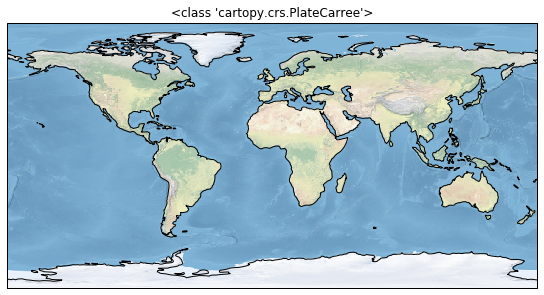

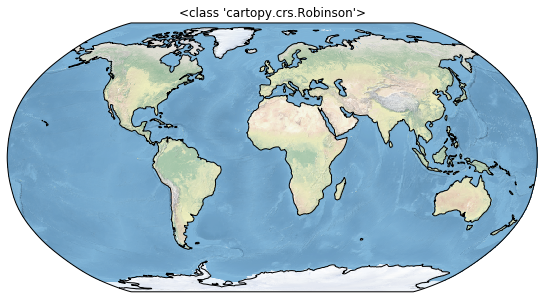

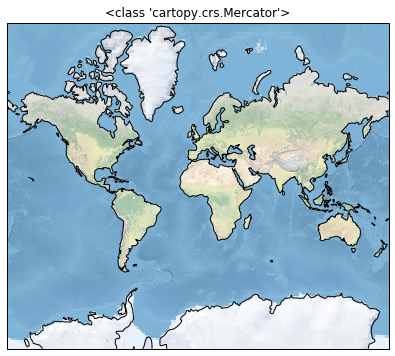

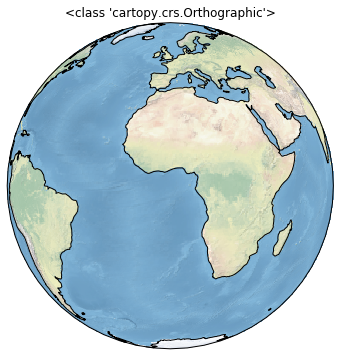

In [ ]:
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
              ]


for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(type(proj))

**2. Карта выбранного участка**

Подписываем сетку координат (в текущей версии Cartopy работает только для PlateCarree и Mercator)

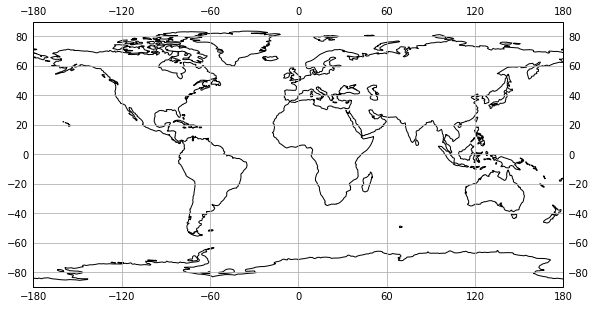

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.gridlines(draw_labels=True)
ax.coastlines()

Экстенты помогают выбрать область для отображения

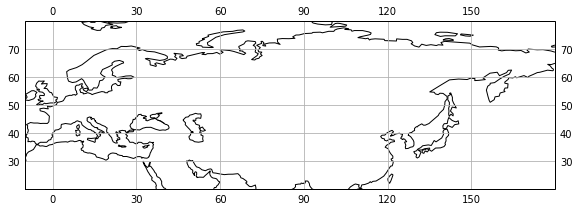

In [ ]:
extent = [-10, 180, 20, 80]
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.gridlines(draw_labels=True)
ax.coastlines()

add_feature - добавляет границы стран, реки, озера и т.п.

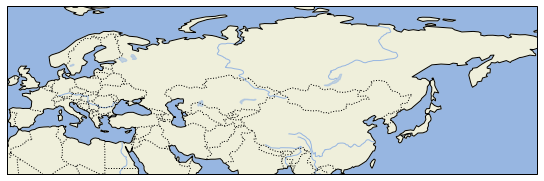

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-10, 180, 20, 80], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle=':')

**3. Карта мира с координатами и подписями**

Text(0.5, -0.2, 'Долгота')

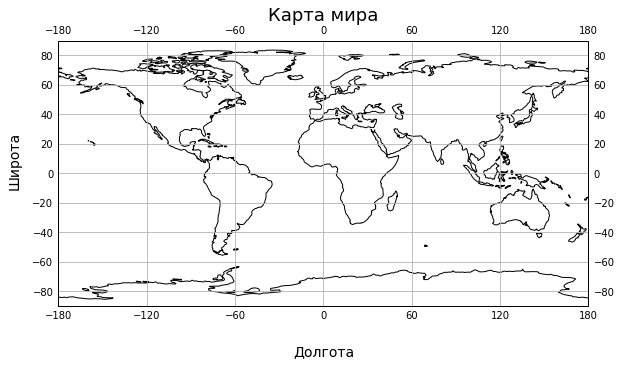

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines(draw_labels=True)

ax.set_title("Карта мира", pad=20, fontsize=18)

ax.text(-0.07, 0.55, 'Широта', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor', transform=ax.transAxes, fontsize=14)
ax.text(0.5, -0.2, 'Долгота', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', transform=ax.transAxes, fontsize=14)

**4. Построим расстояние от Владивостока до Москвы по координатам**

Можем увидеть путь в реальном мире и в проекции. 
Transform - указываем, в какой проекции заданы координаты данных

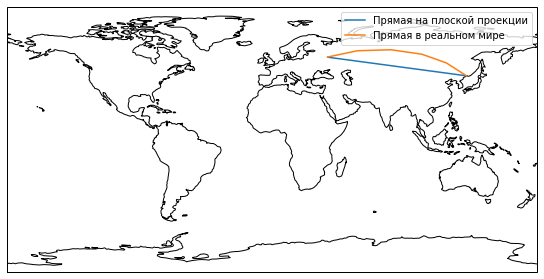

In [ ]:
moscow = dict(lon=37.6156, lat=55.7522)
vladivostok = dict(lon=131.87353, lat=43.10562)

lons = [vladivostok['lon'], moscow['lon']]
lats = [vladivostok['lat'], moscow['lat']]

ax = plt.axes(projection=ccrs.PlateCarree())

ax.plot(lons, lats, label='Прямая на плоской проекции')
ax.plot(lons, lats, label='Прямая в реальном мире', transform=ccrs.Geodetic())

ax.coastlines()

ax.legend()

# Вернуть масштаб всей Земли (иначе сделает приближение на новые рисунки)
ax.set_global()